## Load and Inspect Dataset

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("ecommerce_dataset_10000.csv")

# Basic info
df.info()

# Look at first few rows
df.head()

# Check missing values
df.isnull().sum()

# Check unique counts
print("Unique Products:", df['product_id'].nunique())
print("Unique Categories:", df['category'].nunique())
print("Date Range:", df['order_date'].min(), "to", df['order_date'].max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     10000 non-null  object
 1   first_name      10000 non-null  object
 2   last_name       10000 non-null  object
 3   gender          10000 non-null  object
 4   age_group       10000 non-null  object
 5   signup_date     10000 non-null  object
 6   country         10000 non-null  object
 7   product_id      10000 non-null  object
 8   product_name    10000 non-null  object
 9   category        10000 non-null  object
 10  quantity        10000 non-null  int64 
 11  unit_price      10000 non-null  int64 
 12  order_id        10000 non-null  object
 13  order_date      10000 non-null  object
 14  order_status    10000 non-null  object
 15  payment_method  10000 non-null  object
 16  rating          10000 non-null  int64 
 17  review_text     10000 non-null  object
 18  review_

## Data Cleaning

In [3]:
# Drop unwanted columns (if any)
df = df.drop(columns=['review_id','review_text'], errors='ignore')

# Convert dates
df['order_date'] = pd.to_datetime(df['order_date'])

# Handle missing quantity or price
df = df.dropna(subset=['quantity','unit_price'])

# Replace any invalid negatives
df = df[df['quantity'] > 0]
df = df[df['unit_price'] > 0]

In [4]:
df.head()

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,quantity,unit_price,order_id,order_date,order_status,payment_method,rating,review_date
0,CUST2353,Erica,Oliver,Female,Teenagers,2022-06-29,Canada,PROD108,Fitbit Versa 3,Electronics,3,229,ORD10000,2023-07-13,Pending,Credit Card,2,2025-06-06
1,CUST4463,Christopher,White,Male,Adults,2023-08-24,China,PROD103,Levi's Jeans,Apparel,4,59,ORD10001,2024-08-12,Pending,PayPal,2,2023-08-05
2,CUST4512,Spencer,Foster,Male,Senior,2023-07-18,Germany,PROD111,Lego Star Wars Set,Toys,2,59,ORD10002,2024-08-04,Delivered,Cash on Delivery,5,2023-01-03
3,CUST5711,Jessica,Harris,Male,Teenagers,2025-08-22,France,PROD107,Dyson Vacuum,Home & Kitchen,4,399,ORD10003,2025-05-23,Delivered,Cash on Delivery,2,2023-03-14
4,CUST1296,Amy,Johnson,Female,Teenagers,2021-03-23,Brazil,PROD105,Adidas Running Shoes,Apparel,1,110,ORD10004,2023-07-02,Returned,Cash on Delivery,1,2023-10-18


## Create Derived Columns

In [5]:
# Step 3: Derived columns
df['revenue'] = df['quantity'] * df['unit_price']

# Assume unit_cost = 0.75 * unit_price
df['unit_cost'] = df['unit_price'] * 0.75
df['cost'] = df['quantity'] * df['unit_cost']

# Profit and margin
df['profit'] = df['revenue'] - df['cost']
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Add month & year for trend analysis
df['order_month'] = df['order_date'].dt.to_period('M')
df['order_year'] = df['order_date'].dt.year

In [6]:
df.head()

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,...,payment_method,rating,review_date,revenue,unit_cost,cost,profit,profit_margin_pct,order_month,order_year
0,CUST2353,Erica,Oliver,Female,Teenagers,2022-06-29,Canada,PROD108,Fitbit Versa 3,Electronics,...,Credit Card,2,2025-06-06,687,171.75,515.25,171.75,25.0,2023-07,2023
1,CUST4463,Christopher,White,Male,Adults,2023-08-24,China,PROD103,Levi's Jeans,Apparel,...,PayPal,2,2023-08-05,236,44.25,177.00,59.00,25.0,2024-08,2024
2,CUST4512,Spencer,Foster,Male,Senior,2023-07-18,Germany,PROD111,Lego Star Wars Set,Toys,...,Cash on Delivery,5,2023-01-03,118,44.25,88.50,29.50,25.0,2024-08,2024
3,CUST5711,Jessica,Harris,Male,Teenagers,2025-08-22,France,PROD107,Dyson Vacuum,Home & Kitchen,...,Cash on Delivery,2,2023-03-14,1596,299.25,1197.00,399.00,25.0,2025-05,2025
4,CUST1296,Amy,Johnson,Female,Teenagers,2021-03-23,Brazil,PROD105,Adidas Running Shoes,Apparel,...,Cash on Delivery,1,2023-10-18,110,82.50,82.50,27.50,25.0,2023-07,2023


## Analyze Using Pandas

### Profitability by Category

In [7]:
cat_summary = df.groupby('category', as_index=False).agg({
    'revenue':'sum',
    'profit':'sum',
    'quantity':'sum'
})
cat_summary['profit_margin_pct'] = (cat_summary['profit'] / cat_summary['revenue']) * 100
cat_summary.sort_values('profit', ascending=False)

,category,revenue,profit,quantity,profit_margin_pct
2,Electronics,4529986,1132496.50,7934,25.0
3,Home & Kitchen,1069650,267412.50,4150,25.0
0,Apparel,597636,149409.00,6209,25.0
5,Toys,499894,124973.50,3886,25.0
1,Books,415797,103949.25,3989,25.0
4,Sports,337800,84450.00,3840,25.0


### Top 10 Products by Profit

In [8]:
prod_summary = df.groupby(['product_name'], as_index=False).agg({
    'revenue':'sum','profit':'sum','quantity':'sum'
})
top10 = prod_summary.sort_values('profit', ascending=False).head(10)
top10

,product_name,revenue,profit,quantity
14,iPhone 14,1881117,470279.25,1883
10,Samsung Galaxy S23,1780919,445229.75,1981
2,Dyson Vacuum,876204,219051.00,2196
3,Fitbit Versa 3,442886,110721.50,1934
11,Sony Headphones,425064,106266.00,2136
1,Barbie Dreamhouse,384667,96166.75,1933
12,Wilson Tennis Racket,290550,72637.50,1950
6,Kindle Paperwhite,254517,63629.25,1973
9,Nike Air Max,245040,61260.00,2042
0,Adidas Running Shoes,230230,57557.50,2093


### Monthly Revenue Trend

<Axes: title={'center': 'Monthly Revenue Trend'}, xlabel='order_month'>

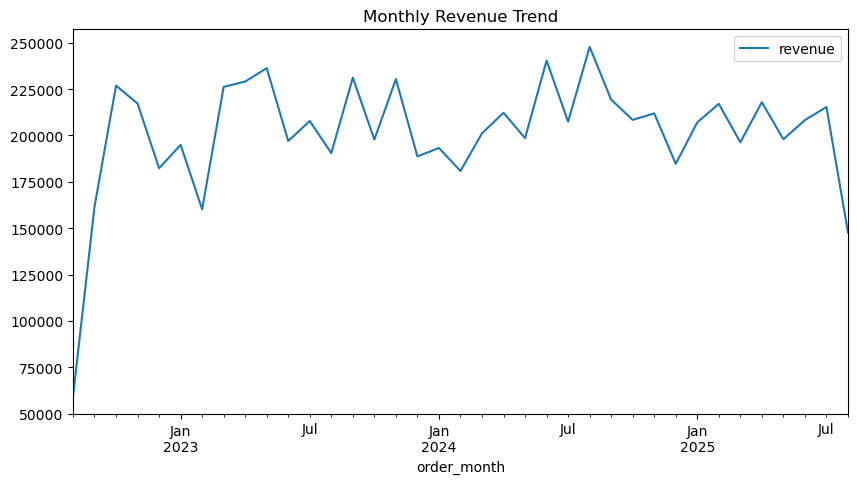

In [9]:
monthly = df.groupby('order_month', as_index=False)['revenue'].sum()
monthly.plot(x='order_month', y='revenue', kind='line', figsize=(10,5), title='Monthly Revenue Trend')

## SQL Analysis

In [10]:
# Fix Period columns before saving to SQL
for col in df.columns:
    if pd.api.types.is_period_dtype(df[col]):
        df[col] = df[col].astype(str)

# Now try inserting again
import sqlite3

conn = sqlite3.connect('retail_project.db')
df.to_sql('retail_data', conn, if_exists='replace', index=False)

print("✅ Data successfully loaded into SQLite!")


✅ Data successfully loaded into SQLite!


C:\Users\Krishna\AppData\Local\Temp\ipykernel_20832\2391970066.py:3: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df[col]):
C:\Users\Krishna\AppData\Local\Temp\ipykernel_20832\2391970066.py:3: DeprecationWarning: is_period_dtype is deprecated and will be removed in a future version. Use `isinstance(dtype, pd.PeriodDtype)` instead
  if pd.api.types.is_period_dtype(df[col]):


In [11]:
from pandas.api.types import PeriodDtype

for col in df.columns:
    if isinstance(df[col].dtype, PeriodDtype):
        df[col] = df[col].astype(str)

### Calculate profitability by category

In [12]:
q1 = """
SELECT 
    category,
    ROUND(SUM(revenue), 2) AS total_revenue,
    ROUND(SUM(profit), 2) AS total_profit,
    ROUND(SUM(profit)*100.0 / SUM(revenue), 2) AS profit_margin_pct
FROM retail_data
GROUP BY category
ORDER BY total_profit DESC;
"""
pd.read_sql_query(q1, conn)


,category,total_revenue,total_profit,profit_margin_pct
0,Electronics,4529986.0,1132496.50,25.0
1,Home & Kitchen,1069650.0,267412.50,25.0
2,Apparel,597636.0,149409.00,25.0
3,Toys,499894.0,124973.50,25.0
4,Books,415797.0,103949.25,25.0
5,Sports,337800.0,84450.00,25.0


### Calculate subcategory-level profit margin

In [13]:
df.columns.tolist()

['customer_id',
 'first_name',
 'last_name',
 'gender',
 'age_group',
 'signup_date',
 'country',
 'product_id',
 'product_name',
 'category',
 'quantity',
 'unit_price',
 'order_id',
 'order_date',
 'order_status',
 'payment_method',
 'rating',
 'review_date',
 'revenue',
 'unit_cost',
 'cost',
 'profit',
 'profit_margin_pct',
 'order_month',
 'order_year']

### Check top 10 most profitable products

In [14]:
q3 = """
SELECT 
    product_id, product_name, category,
    SUM(revenue) AS total_revenue,
    SUM(profit) AS total_profit,
    ROUND(SUM(profit)*100.0/SUM(revenue),2) AS profit_margin_pct
FROM retail_data
GROUP BY product_id, product_name, category
ORDER BY total_profit DESC
LIMIT 10;
"""
pd.read_sql_query(q3, conn)

,product_id,product_name,category,total_revenue,total_profit,profit_margin_pct
0,PROD100,iPhone 14,Electronics,1881117,470279.25,25.0
1,PROD101,Samsung Galaxy S23,Electronics,1780919,445229.75,25.0
2,PROD107,Dyson Vacuum,Home & Kitchen,876204,219051.00,25.0
3,PROD108,Fitbit Versa 3,Electronics,442886,110721.50,25.0
4,PROD102,Sony Headphones,Electronics,425064,106266.00,25.0
5,PROD112,Barbie Dreamhouse,Toys,384667,96166.75,25.0
6,PROD113,Wilson Tennis Racket,Sports,290550,72637.50,25.0
7,PROD109,Kindle Paperwhite,Books,254517,63629.25,25.0
8,PROD104,Nike Air Max,Apparel,245040,61260.00,25.0
9,PROD105,Adidas Running Shoes,Apparel,230230,57557.50,25.0


In [15]:
df.columns.tolist()

['customer_id',
 'first_name',
 'last_name',
 'gender',
 'age_group',
 'signup_date',
 'country',
 'product_id',
 'product_name',
 'category',
 'quantity',
 'unit_price',
 'order_id',
 'order_date',
 'order_status',
 'payment_method',
 'rating',
 'review_date',
 'revenue',
 'unit_cost',
 'cost',
 'profit',
 'profit_margin_pct',
 'order_month',
 'order_year']

## Prepare data (in Python or Excel)

In [17]:
import pandas as pd

# Use only the relevant columns
tableau_df = df[['order_date', 'country', 'category', 'revenue', 'profit', 'quantity']].copy()

# Rename for clarity
tableau_df.rename(columns={
    'country': 'region'
}, inplace=True)

# Convert order_date to datetime
tableau_df['order_date'] = pd.to_datetime(tableau_df['order_date'], errors='coerce')

# Extract month for season
tableau_df['month'] = tableau_df['order_date'].dt.month

# Define season mapping
def get_season(m):
    if m in [12, 1, 2]:
        return 'Winter'
    elif m in [3, 4, 5]:
        return 'Spring'
    elif m in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

tableau_df['season'] = tableau_df['month'].apply(get_season)

# Save as CSV for Tableau
tableau_df.to_csv('retail_simple_tableau.csv', index=False)
print("✅ Tableau file ready: retail_simple_tableau.csv")


✅ Tableau file ready: retail_simple_tableau.csv
